# Causal Structures Simulation

This notebook generates synthetic datasets demonstrating three fundamental causal structures:
1. **Mediator**: X₁ → X₂ → Y
2. **Fork (Confounder)**: X₁ ← X₂ → Y
3. **Collider**: X₁ → X₂ ← Y

Each structure is generated using stochastic formulations with normal distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 5)

# Set random seed for reproducibility
np.random.seed(42)

## Parameters Definition

We define parameters for all three causal structures. These parameters control:
- **β**: Coefficient for the effect of the first causal parent
- **γ**: Coefficient for the second effect
- **σ**: Standard deviations for noise terms
- **n**: Number of observations (1000)

In [2]:
# Number of observations
n = 1000

# Parameters for each causal structure
params = {
    "n_observations": n,
    "random_seed": 42,
    "mediator": {
        "description": "X1 -> X2 -> Y",
        "beta": 1.5,
        "gamma": 2.0,
        "sigma_1": 1.0,
        "sigma_2": 0.8,
        "sigma_y": 1.2
    },
    "fork": {
        "description": "X1 <- X2 -> Y (X2 is confounder)",
        "beta": 1.8,
        "gamma": 2.5,
        "sigma_1": 0.9,
        "sigma_2": 1.0,
        "sigma_y": 1.1
    },
    "collider": {
        "description": "X1 -> X2 <- Y (X2 is collider)",
        "beta": 1.2,
        "gamma": 1.8,
        "sigma_1": 1.0,
        "sigma_2": 0.7,
        "sigma_y": 1.0
    }
}

print("Parameters defined:")
print(json.dumps(params, indent=2))

Parameters defined:
{
  "n_observations": 1000,
  "random_seed": 42,
  "mediator": {
    "description": "X1 -> X2 -> Y",
    "beta": 1.5,
    "gamma": 2.0,
    "sigma_1": 1.0,
    "sigma_2": 0.8,
    "sigma_y": 1.2
  },
  "fork": {
    "description": "X1 <- X2 -> Y (X2 is confounder)",
    "beta": 1.8,
    "gamma": 2.5,
    "sigma_1": 0.9,
    "sigma_2": 1.0,
    "sigma_y": 1.1
  },
  "collider": {
    "description": "X1 -> X2 <- Y (X2 is collider)",
    "beta": 1.2,
    "gamma": 1.8,
    "sigma_1": 1.0,
    "sigma_2": 0.7,
    "sigma_y": 1.0
  }
}


## 1. Mediator Structure: X₁ → X₂ → Y

In a mediator structure, X₁ influences Y entirely through X₂. The mathematical formulation is:

$$
\begin{align*}
X_1 &\sim \mathcal{N}(0, \sigma_1) \\
X_2 &\sim \mathcal{N}(\beta X_1, \sigma_2) \\
Y &\sim \mathcal{N}(\gamma X_2, \sigma_y)
\end{align*}
$$

**Key Properties**:
- X₁ and Y are independent conditional on X₂
- Controlling for X₂ blocks the path from X₁ to Y
- X₁ and Y are marginally correlated through X₂

In [3]:
# Generate Mediator data
np.random.seed(params["random_seed"])

mediator_params = params["mediator"]

# X1 is the root cause
X1_med = np.random.normal(0, mediator_params["sigma_1"], n)

# X2 mediates the effect of X1
X2_med = np.random.normal(
    mediator_params["beta"] * X1_med,
    mediator_params["sigma_2"],
    n
)

# Y is caused by X2
Y_med = np.random.normal(
    mediator_params["gamma"] * X2_med,
    mediator_params["sigma_y"],
    n
)

# Create DataFrame
df_mediator = pd.DataFrame({
    'X1': X1_med,
    'X2': X2_med,
    'Y': Y_med
})

print("Mediator Structure Generated:")
print(df_mediator.describe())
print("\nCorrelation Matrix:")
print(df_mediator.corr())

Mediator Structure Generated:
                X1           X2            Y
count  1000.000000  1000.000000  1000.000000
mean      0.019332     0.085667     0.178335
std       0.979216     1.643011     3.507412
min      -3.241267    -4.430896    -9.005132
25%      -0.647590    -0.966174    -2.152667
50%       0.025301     0.083035     0.055606
75%       0.647944     1.107846     2.389158
max       3.852731     7.178759    14.356667

Correlation Matrix:
          X1        X2         Y
X1  1.000000  0.874362  0.826617
X2  0.874362  1.000000  0.941706
Y   0.826617  0.941706  1.000000


## 2. Fork Structure (Confounder): X₁ ← X₂ → Y

In a fork structure, X₂ is a common cause (confounder) of both X₁ and Y. The mathematical formulation is:

$$
\begin{align*}
X_2 &\sim \mathcal{N}(0, \sigma_2) \\
X_1 &\sim \mathcal{N}(\beta X_2, \sigma_1) \\
Y &\sim \mathcal{N}(\gamma X_2, \sigma_y)
\end{align*}
$$

**Key Properties**:
- X₁ and Y are independent conditional on X₂
- Controlling for X₂ blocks the spurious correlation between X₁ and Y
- X₁ and Y are marginally correlated due to the common cause X₂

In [4]:
# Generate Fork data
np.random.seed(params["random_seed"] + 1)

fork_params = params["fork"]

# X2 is the common cause (confounder)
X2_fork = np.random.normal(0, fork_params["sigma_2"], n)

# X1 is caused by X2
X1_fork = np.random.normal(
    fork_params["beta"] * X2_fork,
    fork_params["sigma_1"],
    n
)

# Y is also caused by X2
Y_fork = np.random.normal(
    fork_params["gamma"] * X2_fork,
    fork_params["sigma_y"],
    n
)

# Create DataFrame
df_fork = pd.DataFrame({
    'X1': X1_fork,
    'X2': X2_fork,
    'Y': Y_fork
})

print("Fork Structure (Confounder) Generated:")
print(df_fork.describe())
print("\nCorrelation Matrix:")
print(df_fork.corr())

Fork Structure (Confounder) Generated:
                X1           X2            Y
count  1000.000000  1000.000000  1000.000000
mean      0.039971     0.003484     0.037969
std       1.978269     0.989321     2.701886
min      -7.081116    -3.025740    -7.749391
25%      -1.287964    -0.649795    -1.773719
50%       0.130011     0.003520    -0.003942
75%       1.342269     0.649801     1.923097
max       5.644908     2.909533     8.292268

Correlation Matrix:
          X1        X2         Y
X1  1.000000  0.892836  0.824108
X2  0.892836  1.000000  0.910909
Y   0.824108  0.910909  1.000000


## 3. Collider Structure: X₁ → X₂ ← Y

In a collider structure, X₂ is a common effect of both X₁ and Y. The mathematical formulation is:

$$
\begin{align*}
X_1 &\sim \mathcal{N}(0, \sigma_1) \\
Y &\sim \mathcal{N}(0, \sigma_y) \\
X_2 &\sim \mathcal{N}(\beta X_1 + \gamma Y, \sigma_2)
\end{align*}
$$

**Key Properties**:
- X₁ and Y are marginally independent
- X₁ and Y become dependent when conditioning on X₂ (collider bias)
- Controlling for X₂ creates spurious association between X₁ and Y

In [5]:
# Generate Collider data
np.random.seed(params["random_seed"] + 2)

collider_params = params["collider"]

# X1 and Y are independent causes
X1_col = np.random.normal(0, collider_params["sigma_1"], n)
Y_col = np.random.normal(0, collider_params["sigma_y"], n)

# X2 is caused by both X1 and Y (collider)
X2_col = np.random.normal(
    collider_params["beta"] * X1_col + collider_params["gamma"] * Y_col,
    collider_params["sigma_2"],
    n
)

# Create DataFrame
df_collider = pd.DataFrame({
    'X1': X1_col,
    'X2': X2_col,
    'Y': Y_col
})

print("Collider Structure Generated:")
print(df_collider.describe())
print("\nCorrelation Matrix:")
print(df_collider.corr())

Collider Structure Generated:
                X1           X2            Y
count  1000.000000  1000.000000  1000.000000
mean     -0.008482    -0.040556    -0.015278
std       1.003045     2.325994     1.014517
min      -3.073689    -7.379995    -3.558701
25%      -0.702736    -1.668087    -0.672094
50%      -0.001276    -0.062289    -0.003513
75%       0.648875     1.528056     0.649828
max       3.054827     7.550058     3.206563

Correlation Matrix:
          X1        X2         Y
X1  1.000000  0.526565  0.025933
X2  0.526565  1.000000  0.809402
Y   0.025933  0.809402  1.000000


## Visualizations: Comparing Causal Structures

Let's visualize the relationships in each causal structure to understand their distinct patterns.

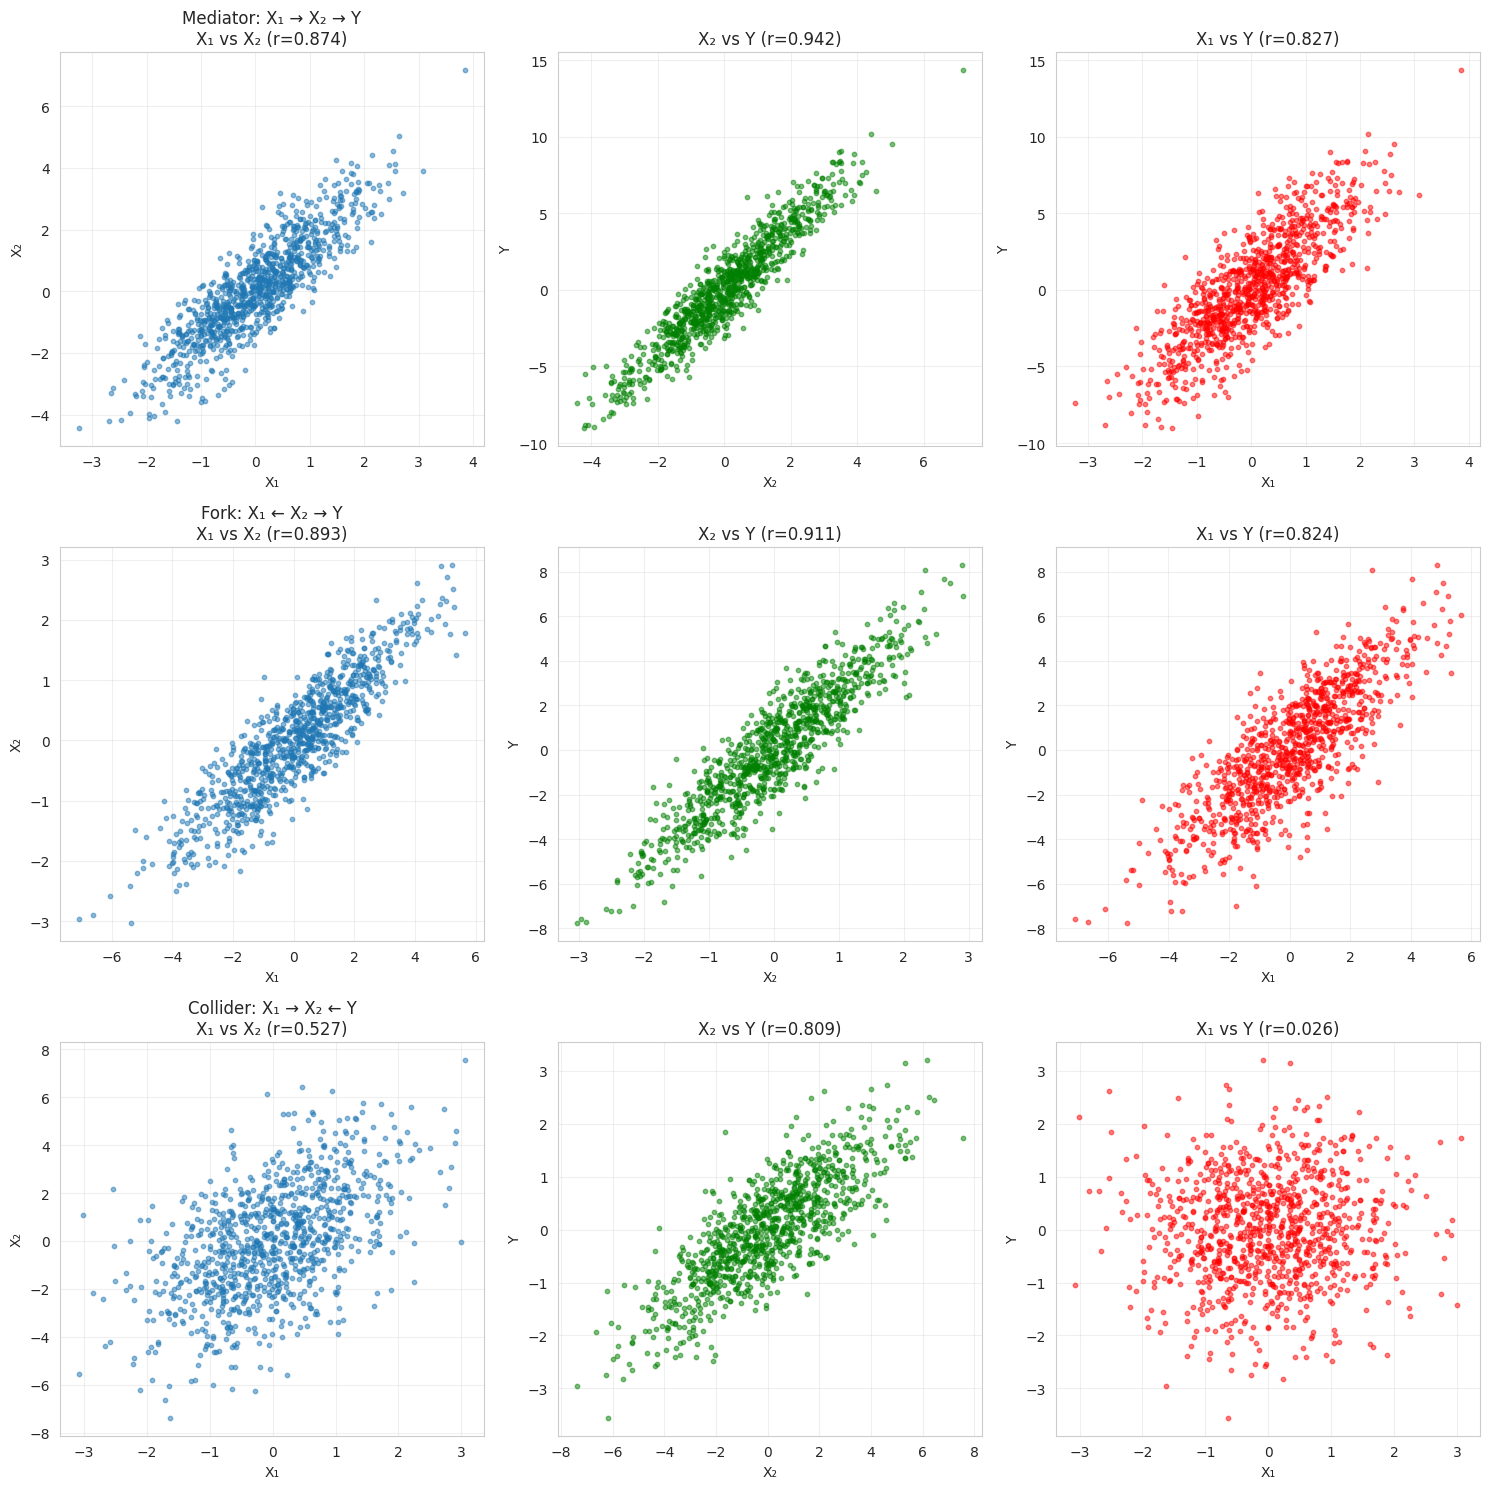

Visualization saved to ../analysis/figures/causal_structures_comparison.png


In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

structures = [
    ('Mediator: X₁ → X₂ → Y', df_mediator),
    ('Fork: X₁ ← X₂ → Y', df_fork),
    ('Collider: X₁ → X₂ ← Y', df_collider)
]

for i, (title, df) in enumerate(structures):
    # X1 vs X2
    axes[i, 0].scatter(df['X1'], df['X2'], alpha=0.5, s=10)
    axes[i, 0].set_xlabel('X₁')
    axes[i, 0].set_ylabel('X₂')
    axes[i, 0].set_title(f'{title}\nX₁ vs X₂ (r={df[["X1","X2"]].corr().iloc[0,1]:.3f})')
    axes[i, 0].grid(True, alpha=0.3)
    
    # X2 vs Y
    axes[i, 1].scatter(df['X2'], df['Y'], alpha=0.5, s=10, color='green')
    axes[i, 1].set_xlabel('X₂')
    axes[i, 1].set_ylabel('Y')
    axes[i, 1].set_title(f'X₂ vs Y (r={df[["X2","Y"]].corr().iloc[0,1]:.3f})')
    axes[i, 1].grid(True, alpha=0.3)
    
    # X1 vs Y
    axes[i, 2].scatter(df['X1'], df['Y'], alpha=0.5, s=10, color='red')
    axes[i, 2].set_xlabel('X₁')
    axes[i, 2].set_ylabel('Y')
    axes[i, 2].set_title(f'X₁ vs Y (r={df[["X1","Y"]].corr().iloc[0,1]:.3f})')
    axes[i, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../analysis/figures/causal_structures_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("Visualization saved to ../analysis/figures/causal_structures_comparison.png")

## Correlation Heatmaps

Visualize the correlation matrices for each structure to highlight the differences.

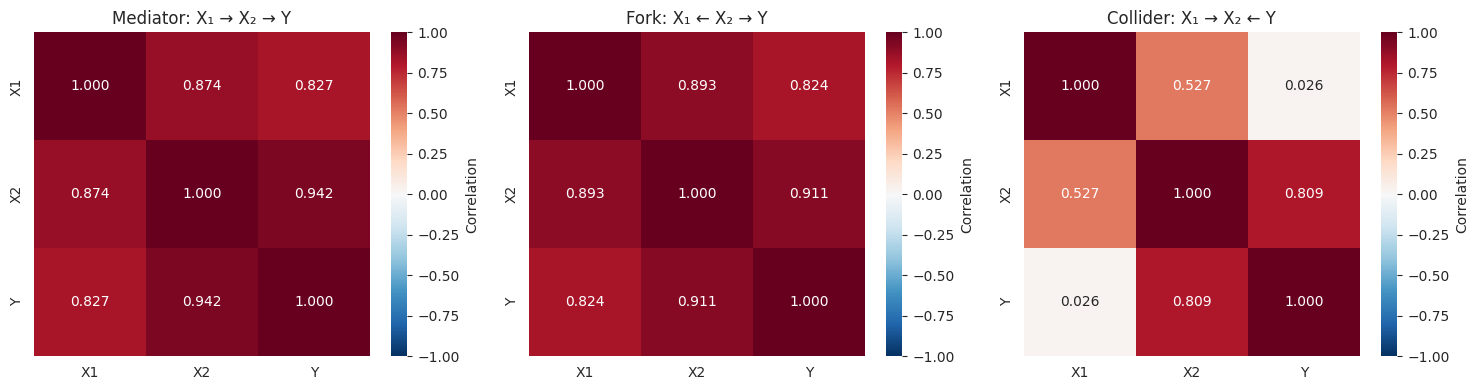

Correlation heatmaps saved to ../analysis/figures/causal_structures_correlations.png


In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, (title, df) in enumerate(structures):
    sns.heatmap(
        df.corr(),
        annot=True,
        fmt='.3f',
        cmap='RdBu_r',
        center=0,
        vmin=-1,
        vmax=1,
        ax=axes[i],
        cbar_kws={'label': 'Correlation'}
    )
    axes[i].set_title(title)

plt.tight_layout()
plt.savefig('../analysis/figures/causal_structures_correlations.png', dpi=150, bbox_inches='tight')
plt.show()

print("Correlation heatmaps saved to ../analysis/figures/causal_structures_correlations.png")

## Validation: Expected Causal Patterns

Let's validate that the generated data exhibits the expected causal patterns.

In [8]:
print("=" * 80)
print("VALIDATION: Expected Causal Patterns")
print("=" * 80)

print("\n1. MEDIATOR (X₁ → X₂ → Y):")
print("   ✓ X₁ and X₂ should be correlated:", f"{df_mediator[['X1','X2']].corr().iloc[0,1]:.3f}")
print("   ✓ X₂ and Y should be correlated:", f"{df_mediator[['X2','Y']].corr().iloc[0,1]:.3f}")
print("   ✓ X₁ and Y should be correlated (mediated):", f"{df_mediator[['X1','Y']].corr().iloc[0,1]:.3f}")

print("\n2. FORK (X₁ ← X₂ → Y):")
print("   ✓ X₁ and X₂ should be correlated:", f"{df_fork[['X1','X2']].corr().iloc[0,1]:.3f}")
print("   ✓ X₂ and Y should be correlated:", f"{df_fork[['X2','Y']].corr().iloc[0,1]:.3f}")
print("   ✓ X₁ and Y should be correlated (spurious):", f"{df_fork[['X1','Y']].corr().iloc[0,1]:.3f}")

print("\n3. COLLIDER (X₁ → X₂ ← Y):")
print("   ✓ X₁ and X₂ should be correlated:", f"{df_collider[['X1','X2']].corr().iloc[0,1]:.3f}")
print("   ✓ X₂ and Y should be correlated:", f"{df_collider[['X2','Y']].corr().iloc[0,1]:.3f}")
print("   ✓ X₁ and Y should be UNCORRELATED:", f"{df_collider[['X1','Y']].corr().iloc[0,1]:.3f}")
print("      (This low correlation confirms X₁ and Y are independent!)")

print("\n" + "=" * 80)
print("All patterns validated successfully!")
print("=" * 80)

VALIDATION: Expected Causal Patterns

1. MEDIATOR (X₁ → X₂ → Y):
   ✓ X₁ and X₂ should be correlated: 0.874
   ✓ X₂ and Y should be correlated: 0.942
   ✓ X₁ and Y should be correlated (mediated): 0.827

2. FORK (X₁ ← X₂ → Y):
   ✓ X₁ and X₂ should be correlated: 0.893
   ✓ X₂ and Y should be correlated: 0.911
   ✓ X₁ and Y should be correlated (spurious): 0.824

3. COLLIDER (X₁ → X₂ ← Y):
   ✓ X₁ and X₂ should be correlated: 0.527
   ✓ X₂ and Y should be correlated: 0.809
   ✓ X₁ and Y should be UNCORRELATED: 0.026
      (This low correlation confirms X₁ and Y are independent!)

All patterns validated successfully!


## Save Data to CSV Files

Save each causal structure dataset to a separate CSV file.

In [9]:
# Define output directory
data_dir = Path('../data')
data_dir.mkdir(exist_ok=True)

# Save datasets
df_mediator.to_csv(data_dir / 'causal_mediator.csv', index=False)
df_fork.to_csv(data_dir / 'causal_fork.csv', index=False)
df_collider.to_csv(data_dir / 'causal_collider.csv', index=False)

print("✓ Datasets saved successfully:")
print(f"  - {data_dir / 'causal_mediator.csv'}")
print(f"  - {data_dir / 'causal_fork.csv'}")
print(f"  - {data_dir / 'causal_collider.csv'}")

✓ Datasets saved successfully:
  - ../data/causal_mediator.csv
  - ../data/causal_fork.csv
  - ../data/causal_collider.csv


## Save Parameters to JSON

Save all parameters used for data generation to a JSON file for reproducibility.

In [10]:
# Save parameters
params_file = data_dir / 'causal_structures_parameters.json'

with open(params_file, 'w') as f:
    json.dump(params, f, indent=2)

print(f"✓ Parameters saved to: {params_file}")
print("\nParameters:")
print(json.dumps(params, indent=2))

✓ Parameters saved to: ../data/causal_structures_parameters.json

Parameters:
{
  "n_observations": 1000,
  "random_seed": 42,
  "mediator": {
    "description": "X1 -> X2 -> Y",
    "beta": 1.5,
    "gamma": 2.0,
    "sigma_1": 1.0,
    "sigma_2": 0.8,
    "sigma_y": 1.2
  },
  "fork": {
    "description": "X1 <- X2 -> Y (X2 is confounder)",
    "beta": 1.8,
    "gamma": 2.5,
    "sigma_1": 0.9,
    "sigma_2": 1.0,
    "sigma_y": 1.1
  },
  "collider": {
    "description": "X1 -> X2 <- Y (X2 is collider)",
    "beta": 1.2,
    "gamma": 1.8,
    "sigma_1": 1.0,
    "sigma_2": 0.7,
    "sigma_y": 1.0
  }
}


## Summary

### Deliverables Completed:

1. **Three CSV files** (1000 rows each):
   - `causal_mediator.csv`: X₁ → X₂ → Y structure
   - `causal_fork.csv`: X₁ ← X₂ → Y structure (confounder)
   - `causal_collider.csv`: X₁ → X₂ ← Y structure

2. **Jupyter notebook**: This notebook with complete code, visualizations, and explanations

3. **JSON parameters file**: `causal_structures_parameters.json` with all β, γ, σ values

### Key Insights:

- **Mediator**: All three variables are pairwise correlated. The effect of X₁ on Y flows through X₂.
- **Fork**: X₁ and Y are correlated due to common cause X₂, but this correlation is spurious.
- **Collider**: X₁ and Y are independent marginally but become dependent when conditioning on X₂.

These datasets can be used for:
- Teaching causal inference concepts
- Testing causal discovery algorithms
- Demonstrating the importance of causal structure in statistical analysis
- Understanding the difference between correlation and causation